#	Some tries to check whether principal components are correlated

In [1]:
import sys
import lalsimulation as lalsim
import lal
sys.path.insert(1, '/home/stefano/Desktop/Stefano/scuola/uni/tesi_magistrale/code/routines')
from GW_helper import *
import matplotlib.pyplot as plt
import keras

from ML_routines import *
from EM_MoE import *

Using TensorFlow backend.


In [2]:
theta_vector, amp_dataset, ph_dataset, frequencies = load_dataset("../datasets/GW_TD_dataset/GW_TD_dataset.dat", shuffle=False, N_grid = None) #loading dataset

print("Loaded data with shape: "+ str(ph_dataset.shape))

train_frac = .85

train_theta, test_theta, train_amp, test_amp = make_set_split(theta_vector, amp_dataset, train_frac, 1e-21)
train_theta, test_theta, train_ph, test_ph   = make_set_split(theta_vector, ph_dataset, train_frac, 1.)

Loaded data with shape: (8000, 3000)


In [10]:
    #fitting comp
K= 10 #number of experts
feat_num = 2900
y_train = train_ph[:,feat_num]
y_test = test_ph[:,feat_num]

new_features = ["00", "11","22", "01", "02", "12"]
train_theta_big = add_extra_features(train_theta, new_features)
test_theta_big = add_extra_features(test_theta, new_features)


gat_model = keras.Sequential()
gat_model.add(keras.layers.Dense(5, activation='relu'))
gat_model.add(keras.layers.Dense(K, activation='softmax'))
gat_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model = MoE_model(3+len(new_features),K, gat_model)
#args = ["adam", None,   0e-4, False,  1e-4,		150,    2e-3]
args = [None,2,2]
model.fit(train_theta_big, y_train, threshold = 1e-2, args = args, 
          verbose = True, val_set = (test_theta_big,y_test))
y_pred = model.predict(test_theta_big)

Epoch 1/2
 - 1s - loss: 2.6545 - acc: 0.1747
Epoch 2/2
 - 0s - loss: 2.0809 - acc: 0.4899
Epoch 1/2
 - 0s - loss: 2.0024 - acc: 0.4968
Epoch 2/2
 - 0s - loss: 1.9513 - acc: 0.4788
Epoch 1/2
 - 0s - loss: 1.7884 - acc: 0.9103
Epoch 2/2
 - 0s - loss: 1.7779 - acc: 0.9225
LL at iter 1=  (-1.7045223827133553, -1.6862862951476427)
   Val loss:  3.0608034281063565
Chosen the best!
Epoch 1/2
 - 0s - loss: 1.5022 - acc: 0.8557
Epoch 2/2
 - 0s - loss: 1.4910 - acc: 0.8647
LL at iter 2=  (-1.3754424957161615, -1.3584123788031435)
   Val loss:  2.248675745694762
Chosen the best!
Epoch 1/2
 - 0s - loss: 1.2865 - acc: 0.8497
Epoch 2/2
 - 0s - loss: 1.2752 - acc: 0.8535
LL at iter 3=  (-1.1393299962468015, -1.119684172704481)
   Val loss:  1.8415938183369558
Chosen the best!
Epoch 1/2
 - 0s - loss: 1.1401 - acc: 0.8369
Epoch 2/2
 - 0s - loss: 1.1292 - acc: 0.8415
LL at iter 4=  (-0.9747430695286802, -0.9590057838256052)
   Val loss:  1.602004454758755
Chosen the best!
Epoch 1/2
 - 0s - loss: 1.0470 

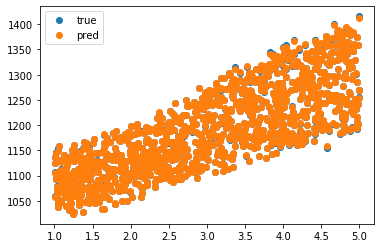

0.4336736067309756


In [4]:
feat = 0 #1,2 index of feature to plot everything against
plt.figure()
#%matplotlib notebook
plt.plot(test_theta_big[:,feat],y_test,'o', label="true")
plt.plot(test_theta_big[:,feat],y_pred, 'o',label="pred")
plt.legend()
plt.show()

#computing errors
mse = np.sum(np.square( (y_test-y_pred)))/(y_test.shape[0])
print(mse)

In [14]:
folder = "GW_TD_dataset/"
train_theta = np.loadtxt("../datasets/"+folder+"PCA_train_theta_full.dat")
test_theta = np.loadtxt("../datasets/"+folder+"PCA_test_theta_full.dat")
PCA_train_ph = np.loadtxt("../datasets/"+folder+"PCA_train_full_ph.dat")
PCA_test_ph = np.loadtxt("../datasets/"+folder+"PCA_test_full_ph.dat")
PCA_train_amp = np.loadtxt("../datasets/"+folder+"PCA_train_full_amp.dat")
PCA_test_amp = np.loadtxt("../datasets/"+folder+"PCA_test_full_amp.dat")

print(np.max(train_theta[:,1]), np.min(train_theta[:,1]))

<IPython.core.display.Javascript object>


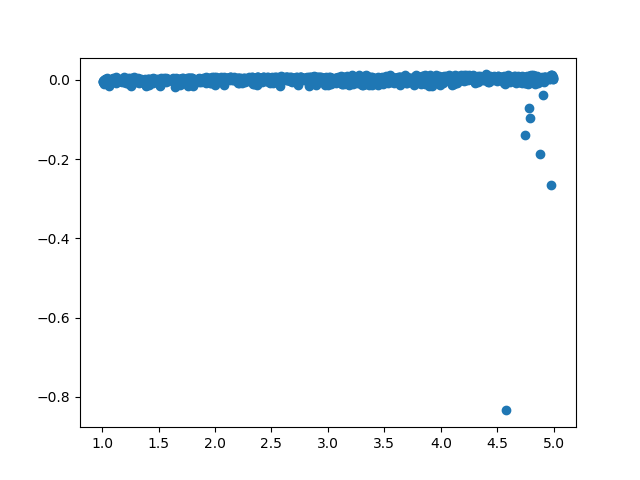

In [15]:
#%matplotlib notebook
plt.plot(test_theta[:,0],PCA_test_ph[:,3], 'o')
plt.show()

In [16]:
print(train_theta[np.where(PCA_train_ph[:,3]<-0.1)])

[[ 4.96836546 -0.78638034  0.03368877]
 [ 4.87589541 -0.74086812 -0.76092915]
 [ 4.85942305 -0.72825756 -0.60707037]
 [ 4.90044575 -0.76214927 -0.77910428]
 [ 4.25501967 -0.80935973 -0.74547187]
 [ 4.94723352 -0.79006958 -0.43552112]
 [ 4.61130901 -0.74371375 -0.74265882]
 [ 4.59999116 -0.81387727 -0.73004378]
 [ 4.20928215 -0.80096765 -0.64274174]
 [ 4.79607146 -0.81537753 -0.66359671]
 [ 4.92051169 -0.79183661 -0.44836728]
 [ 4.60993184 -0.76549325 -0.72091419]
 [ 4.36787312 -0.80931908 -0.4755964 ]
 [ 4.99177037 -0.66258999 -0.74848304]
 [ 4.87660011 -0.77719825 -0.78107278]
 [ 4.33058553 -0.79813853 -0.47997007]
 [ 4.85619968 -0.70614736 -0.66189592]
 [ 4.52058037 -0.80011023 -0.34255225]
 [ 4.78945183 -0.746586   -0.66927985]
 [ 4.85436448 -0.7664799  -0.39932632]
 [ 4.02320284 -0.80997002 -0.71000765]
 [ 4.64487128 -0.81154969 -0.47668645]
 [ 4.99652469 -0.68634876 -0.63697512]
 [ 4.79978809 -0.81689297 -0.07320432]
 [ 4.61584005 -0.75062162 -0.6108306 ]
 [ 4.95203526 -0.80528096

In [17]:
train_indices = np.where((np.multiply(test_theta[:,1]<-0.74, test_theta[:,0]>4.5)))
print(train_indices)
print(test_theta[train_indices,:])

(array([   0,    9,   14,   49,  343,  352,  803,  945, 1173]),)
[[[ 4.80022721 -0.80347837  0.58890782]
  [ 4.87520659 -0.7423229  -0.38250247]
  [ 4.81683267 -0.79571043  0.23294021]
  [ 4.75060651 -0.8112561  -0.01865574]
  [ 4.78939111 -0.81192943  0.05857168]
  [ 4.97510452 -0.74656653 -0.03467654]
  [ 4.6878836  -0.75756799  0.69604681]
  [ 4.97278994 -0.81271173  0.10670977]
  [ 4.58042863 -0.8163865  -0.71072592]]]


In [ ]:
print(test_theta[:,0])